In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agricultural-raw-material-prices-19902020/agricultural_raw_material.csv
/kaggle/input/agriculral/cotton field.jpg


![](https://www.ulf.com.ua/img/how_to_become.jpg)

# About Data

Content
This dataset comprises of prices and price % change for coarse wool, copra, cotton, fine wool, hardlog, hard sawnwood, hide, plywood, rubber, softlog, soft sawnwood and wood pulp.

# Perform data preparation & cleaning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df= pd.read_csv("/kaggle/input/agricultural-raw-material-prices-19902020/agricultural_raw_material.csv",index_col="Month")
df

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,-0.22%,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,-0.15%,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,-0.68%,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%


In [3]:
df.head()


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [4]:
df.tail(34)

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Jul-17,NaN,NaN,"1,059.00",-5.36%,1.85,-1.07%,NaN,NaN,264.62,-1.40%,...,485.38,-1.40%,1.75,1.74%,NaN,NaN,NaN,NaN,875.0,0.00%
Aug-17,NaN,NaN,"1,062.00",0.28%,1.75,-5.41%,NaN,NaN,270.96,2.40%,...,497.00,2.39%,1.84,5.14%,NaN,NaN,NaN,NaN,875.0,0.00%
Sep-17,NaN,NaN,"1,015.00",-4.43%,1.78,1.71%,NaN,NaN,268.93,-0.75%,...,493.27,-0.75%,1.86,1.09%,NaN,NaN,NaN,NaN,875.0,0.00%
Oct-17,NaN,NaN,989,-2.56%,1.73,-2.81%,NaN,NaN,263.62,-1.97%,...,483.53,-1.97%,1.64,-11.83%,NaN,NaN,NaN,NaN,875.0,0.00%
Nov-17,NaN,NaN,"1,038.00",4.95%,1.77,2.31%,NaN,NaN,263.85,0.09%,...,483.96,0.09%,1.57,-4.27%,NaN,NaN,NaN,NaN,875.0,0.00%
Dec-17,NaN,NaN,958,-7.71%,1.88,6.21%,NaN,NaN,263.62,-0.09%,...,483.53,-0.09%,1.65,5.10%,NaN,NaN,NaN,NaN,875.0,0.00%
Jan-18,NaN,NaN,942.5,-1.62%,2.01,6.91%,NaN,NaN,268.30,1.78%,...,492.12,1.78%,1.72,4.24%,NaN,NaN,NaN,NaN,875.0,0.00%
Feb-18,NaN,NaN,835,-11.41%,1.95,-2.99%,NaN,NaN,275.80,2.80%,...,505.88,2.80%,1.72,0.00%,NaN,NaN,NaN,NaN,875.0,0.00%
Mar-18,NaN,NaN,745,-10.78%,2.03,4.10%,NaN,NaN,280.72,1.78%,...,514.90,1.78%,1.76,2.33%,NaN,NaN,NaN,NaN,875.0,0.00%


In [5]:
df._info_axis

Index(['Coarse wool Price', 'Coarse wool price % Change', 'Copra Price',
       'Copra price % Change', 'Cotton Price', 'Cotton price % Change',
       'Fine wool Price', 'Fine wool price % Change', 'Hard log Price',
       'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, Apr-90 to Apr-20
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    object 
 1   Coarse wool price % Change    327 non-null    object 
 2   Copra Price                   339 non-null    object 
 3   Copra price % Change          339 non-null    object 
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         361 non-null    object 
 6   Fine wool Price               327 non-null    object 
 7   Fine wool price % Change      327 non-null    object 
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       361 non-null    object 
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  327 non-null    object 
 12  Hide Price                    327 non-null    float64
 13  Hi

In [7]:
df.describe()


,Cotton Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
count,361.000000,361.000000,327.000000,327.000000,361.000000,361.000000,327.000000,327.000000,360.000000
mean,1.640000,251.034072,707.950367,78.566667,508.216122,1.656427,164.527462,291.061713,696.670889
std,0.513319,65.628406,144.563241,13.690623,89.274718,1.017086,25.596308,34.113959,161.156936
min,0.820000,133.280000,413.370000,28.590000,312.360000,0.490000,119.350000,183.610000,384.000000
25%,1.290000,197.960000,573.470000,69.495000,442.540000,0.860000,145.970000,277.590000,549.777500
50%,1.600000,253.010000,728.710000,77.250000,505.040000,1.440000,160.370000,294.960000,693.580000
75%,1.850000,282.970000,831.635000,86.000000,570.790000,2.060000,180.210000,310.865000,875.000000
max,5.060000,520.810000,973.600000,114.630000,751.810000,6.260000,259.970000,372.600000,966.490000


In [8]:
df.isnull().sum()

Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

# Perform Exploratory Analysis & Visualisation
# 

# 1 Count of Cost according to diffrent material and find out cost change in each and every material 

In [9]:
import plotly.express as px


In [10]:
Cost=["Coarse wool Price","Copra Price","Cotton Price","Fine wool Price","Hard log Price","Hard sawnwood Price","Hide Price","Plywood Price","Rubber Price","Softlog Price","Soft sawnwood Price",
"Wood pulp Price"]
Colour=['#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa','#b84949', '#ff6f00', '#ffbb00']
    
import plotly.express as px
x=0
for i in Cost:
    #df = px.data.tips()
    fig = px.histogram(df, x=i, nbins=100, opacity=0.8,
                   color_discrete_sequence=[Colour[x]])
    fig.show()
    x+=1    


# 2 Count %change in cost of all material 

In [11]:
# Remove '%' character from the DataFrame
df = df.replace('%', '', regex=True)

# Remove ',' character from the DataFrame
df = df.replace(',', '', regex=True)

# Remove '-' character from the DataFrame
df = df.replace('-', '', regex=True)

# Replace empty strings with NaN in the DataFrame
df = df.replace('', np.nan)  # Empty strings are replaced with NaN values

In [12]:
df.dropna()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
May-90,447.26,7.27,234,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
Jun-90,440.99,1.40,216,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
Jul-90,418.44,5.11,205,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
Aug-90,418.44,0.00,198,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
Sep-90,412.18,1.50,196,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Feb-17,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,1.88,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
Mar-17,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,0.01,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
Apr-17,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,2.60,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00


In [13]:
# Convert DataFrame to float
df = df.astype("float")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, Apr-90 to Apr-20
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    float64
 1   Coarse wool price % Change    326 non-null    float64
 2   Copra Price                   339 non-null    float64
 3   Copra price % Change          338 non-null    float64
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         360 non-null    float64
 6   Fine wool Price               327 non-null    float64
 7   Fine wool price % Change      326 non-null    float64
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       360 non-null    float64
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  326 non-null    float64
 12  Hide Price                    327 non-null    float64
 13  Hi

# Visualisation of price % change of all material

**1 Coarse wool price % Change**

<AxesSubplot: xlabel='Month'>

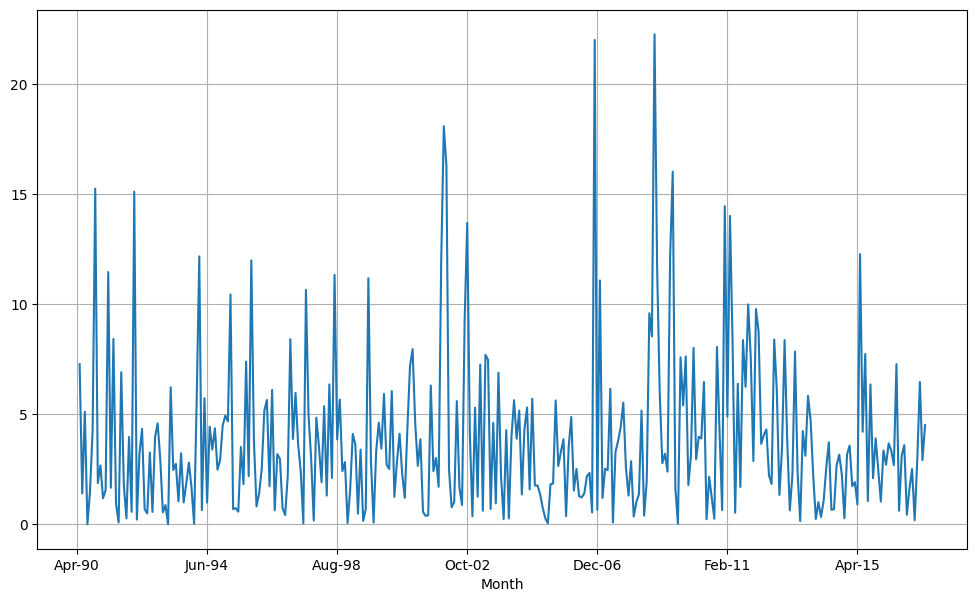

In [15]:
# Plotting the column "Coarse wool price % Change"
df["Coarse wool price % Change"].plot(figsize=(12, 7), grid=True)


***2.Copra price % Change***

<AxesSubplot: xlabel='Month'>

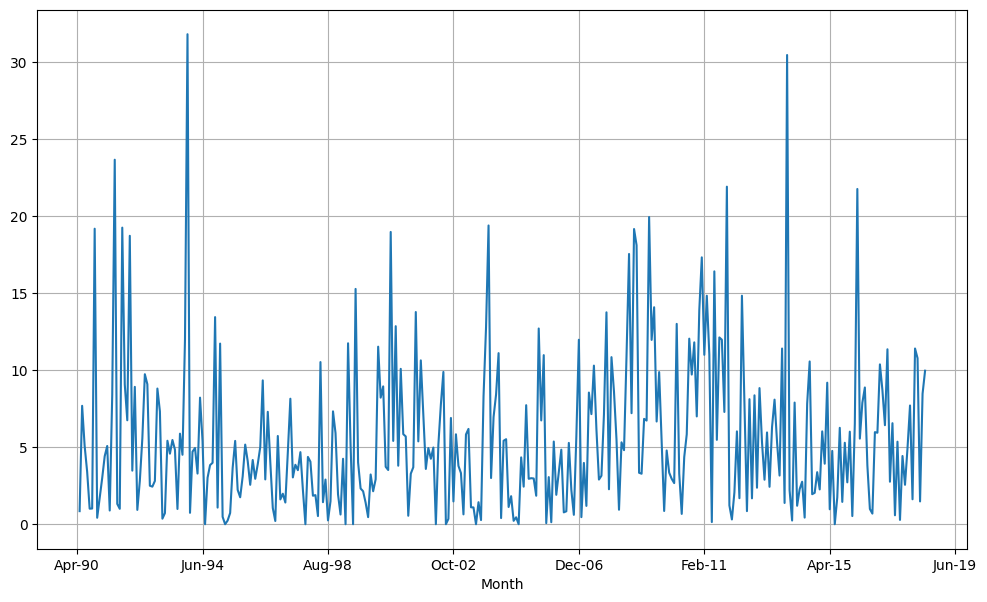

In [17]:
# Plotting the column "Copra price % Change"
df["Copra price % Change"].plot(figsize=(12, 7), grid=True)


**3 Cotton price % Change**

<AxesSubplot: xlabel='Month'>

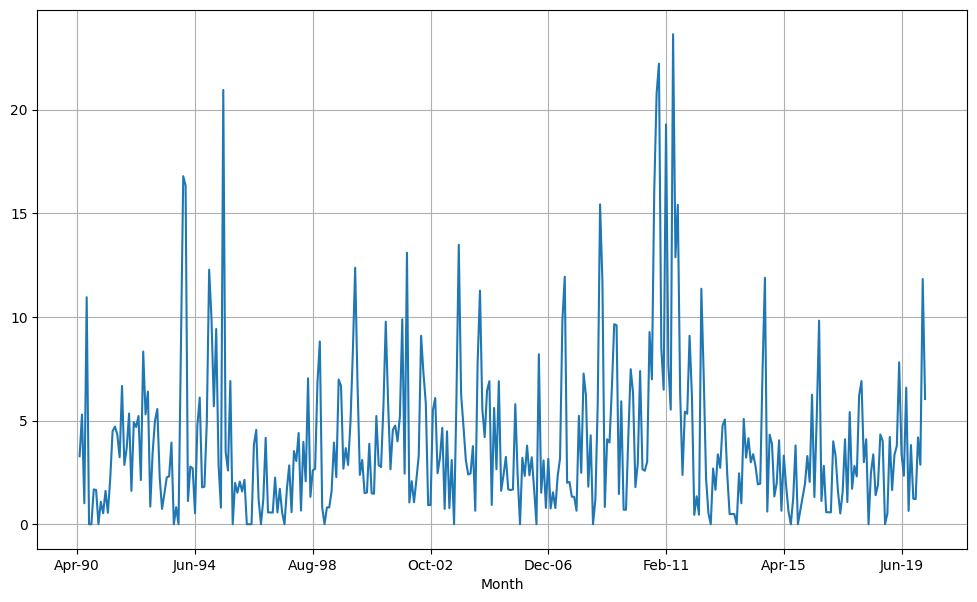

In [18]:
# Plotting the column "Cotton price % Change"
df["Cotton price % Change"].plot(figsize=(12, 7), grid=True)


**4 Fine wool price % Change**

<AxesSubplot: xlabel='Month'>

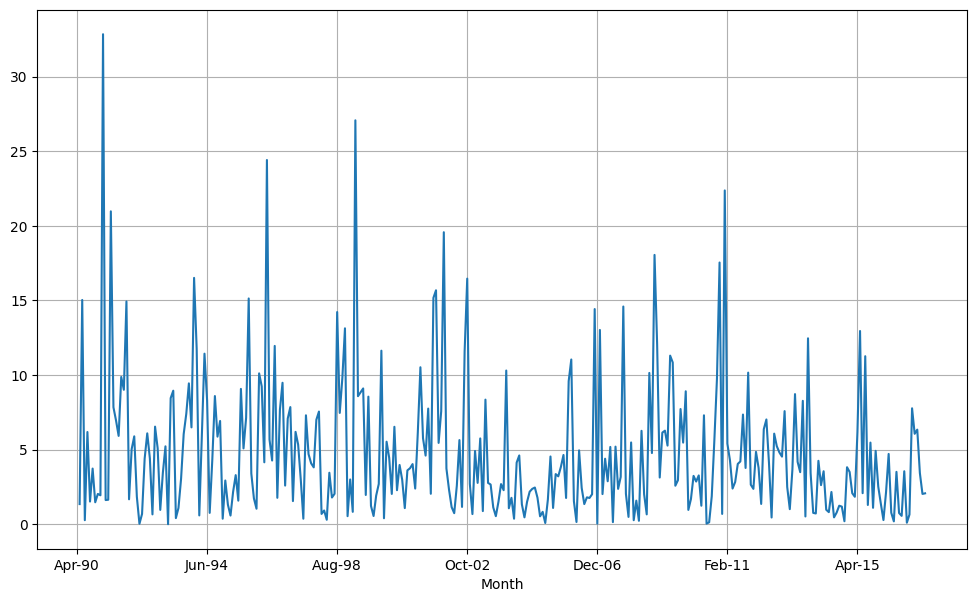

In [19]:
# Plotting the column "Fine wool price % Change"
df["Fine wool price % Change"].plot(figsize=(12, 7), grid=True)


**5 Hard log price % Change**

<AxesSubplot: xlabel='Month'>

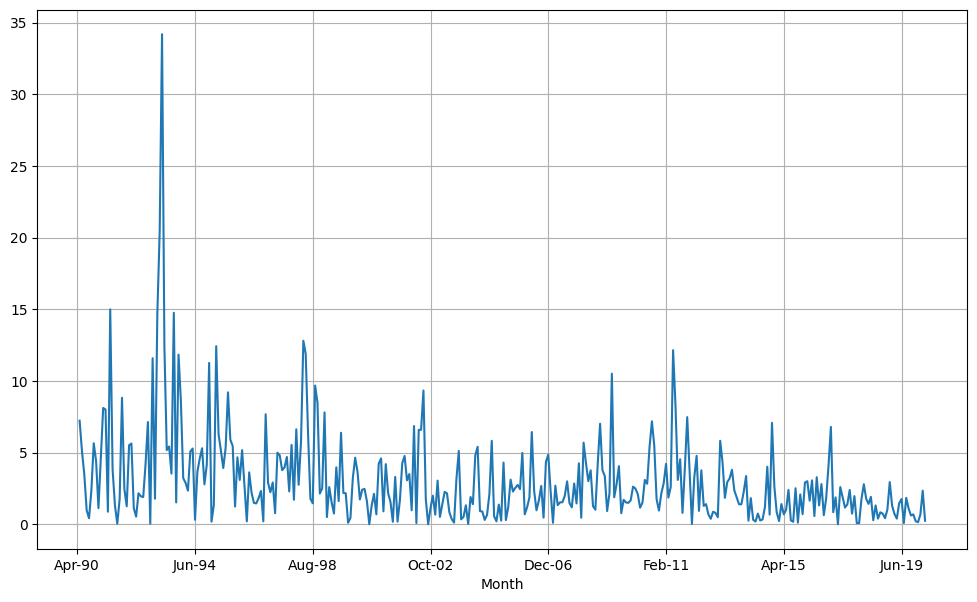

In [20]:
# Plotting the column "Hard log price % Change"
df["Hard log price % Change"].plot(figsize=(12, 7), grid=True)


**6 Hide price % change**

<AxesSubplot: xlabel='Month'>

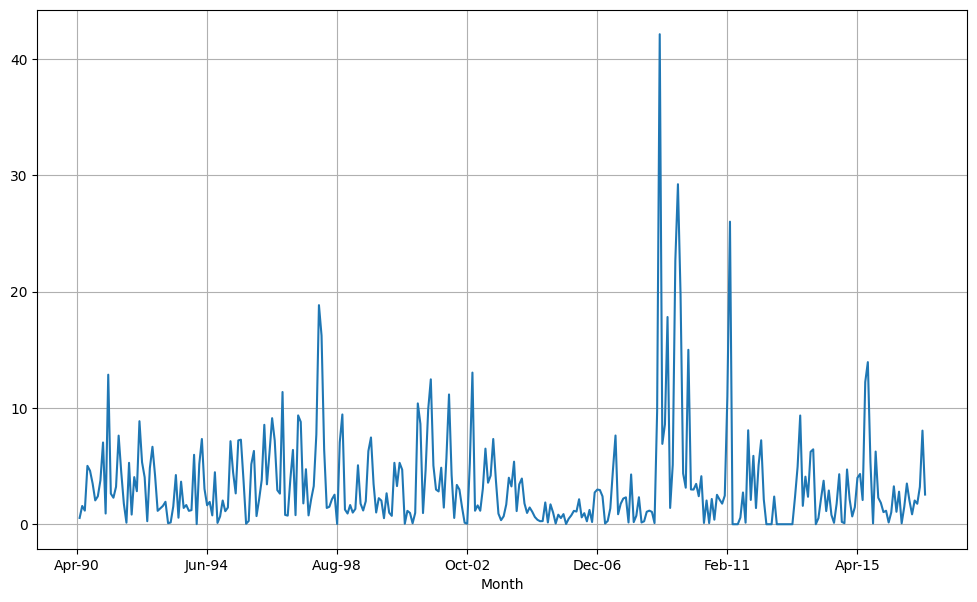

In [21]:
# Plotting the column "Hide price % change"
df["Hide price % change"].plot(figsize=(12, 7), grid=True)


# 3 What is the highest and lowest price achieved for all material and what was the respective month?¶


**1.Coarse wool Price**

In [49]:
# Finding the row with the maximum value in the "Coarse wool Price" column
df[df["Coarse wool Price"] == df["Coarse wool Price"].max()]


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Feb-12,1391.47,8.75,945.0,2.07,2.22,0.45,1560.82,3.78,374.98,3.29,...,612.3,0.44,4.0,10.19,142.61,1.6,271.01,3.61,780.34,0.22


In [48]:
# Finding the row with the minimum value in the "Coarse wool Price" column
df[df["Coarse wool Price"] == df["Coarse wool Price"].min()]


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Sep-99,247.09,2.85,421.0,2.32,1.09,2.68,623.26,1.23,202.78,2.19,...,455.51,3.11,0.54,3.57,158.89,0.3,314.87,6.31,544.56,6.47


**2 Cotton Price**

In [47]:
# Finding the row with the maximum value in the "Cotton Price" column
df[df["Cotton Price"] == df["Cotton Price"].max()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Mar-11,1209.44,14.0,1280.0,14.84,5.06,7.66,1702.98,4.28,334.76,1.87,...,592.22,0.6,5.42,13.42,150.1,0.13,270.59,2.9,909.63,2.69


In [45]:
# Finding the row with the minimum value in the "Cotton Price" column
df[df["Cotton Price"] == df["Cotton Price"].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Oct-01,330.29,3.01,195.0,7.14,0.82,9.89,441.98,15.68,149.64,4.27,...,404.02,1.9,0.54,6.9,144.92,9.63,274.31,3.04,440.56,4.7


**3 Fine wool Price**

In [44]:
# Finding the row with the maximum value in the "Fine wool Price" column
df[df["Fine wool Price"] == df["Fine wool Price"].max()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Jun-11,1385.67,6.38,1186.0,16.42,3.18,12.88,1865.44,4.04,417.56,8.39,...,607.75,0.35,4.93,3.71,157.68,2.01,273.55,1.58,950.43,1.3


In [43]:
# Finding the row with the minimum value in the "Fine wool Price" column
df[df["Fine wool Price"] == df["Fine wool Price"].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Oct-98,286.85,2.41,439.0,7.33,1.36,6.85,417.47,9.81,162.95,8.5,...,379.23,8.6,0.73,7.35,166.64,1.26,265.69,4.05,463.12,3.65


**4 Hard log Price**

In [50]:
# Finding the row with the maximum value in the "Hard log Price" column
df[df["Hard log Price"] == df["Hard log Price"].max()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
May-93,337.01,2.46,274.0,4.58,1.33,1.48,468.13,8.95,520.81,12.39,...,751.81,1.85,0.81,1.22,243.97,9.95,292.74,2.88,443.45,1.84


In [35]:
# Finding the row with the minimum value in the "Hard log Price" column
df[df["Hard log Price"]==df["Hard log Price"].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Jan-02,444.11,18.07,221.0,4.25,0.96,1.05,599.55,19.57,133.28,3.51,...,369.35,4.4,0.57,16.33,144.77,2.45,252.9,5.27,439.97,2.0


**5 Hard sawnwood Price**

In [51]:
# Finding the row with the maximum value in the "Hard sawnwood Price" column
df[df["Hard sawnwood Price"]==df["Hard sawnwood Price"].max()]


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Aug-11,1248.45,8.36,985.0,12.13,2.52,6.32,1655.59,7.35,450.03,4.54,...,619.18,1.06,4.68,1.06,147.1,3.65,293.56,2.67,936.17,1.98


In [59]:
# Finding the row with the minimum value in the "Hard log Price" column
df[df["Hard sawnwood Price"]==df["Hard sawnwood Price"].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Jan-98,399.02,3.53,378.0,4.06,1.59,3.05,636.11,7.55,197.1,6.63,...,409.42,3.69,0.68,6.85,157.44,4.65,287.3,4.22,565.04,4.26


**6   Hide Price**

In [52]:
# Finding the row with the maximum value in the "Hide Price" column
df[df["Hide Price"]==df["Hide Price"].max()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Sep-14,996.74,3.16,785.0,1.95,1.62,0.61,1056.5,1.24,277.55,4.02,...,509.09,4.02,1.67,10.22,166.24,5.42,296.18,5.23,875.0,0.0


In [58]:
# Finding the row with the minimum value in the "Hard log Price" column
df[df["Hide Price"]==df["Hide Price"].min()]


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Mar-09,460.47,2.39,416.0,6.73,1.14,6.56,617.15,5.27,288.57,10.51,...,570.79,0.38,1.43,2.05,147.09,12.73,310.82,2.57,537.7,2.21


**7 Plywood Price**

In [57]:
# Finding the row with the maximum value in the "Plywood Price" column
df[df["Plywood Price"]==df["Plywood Price"].max()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
May-93,337.01,2.46,274.0,4.58,1.33,1.48,468.13,8.95,520.81,12.39,...,751.81,1.85,0.81,1.22,243.97,9.95,292.74,2.88,443.45,1.84


In [ ]:
# Finding the row with the minimum value in the "Hard log Price" column
df[df["Plywood Price"]==df["Plywood Price"].min()]

**8 Rubber Price**

In [56]:
# Finding the row with the maximum value in the "Rubber Price" column
df[df["Rubber Price"]==df["Rubber Price"].max()]


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Feb-11,1060.91,4.89,1503.0,11.0,4.7,19.29,1633.11,5.4,328.63,4.22,...,588.69,0.72,6.26,13.41,150.29,1.43,262.96,9.89,885.82,0.77


In [42]:
# Finding the row with the minimum value in the "Rubber Price" column
df[df["Rubber Price"]==df["Rubber Price"].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Dec-01,376.13,11.97,212.0,4.95,0.95,13.1,501.44,7.58,138.13,3.07,...,386.33,3.57,0.49,3.92,141.31,7.07,266.97,7.65,448.93,1.47


**9  Softlog Price**

In [55]:
# Finding the row with the maximum value in the "Softlog Price" column
df[df["Softlog Price"]==df["Softlog Price"].max()]


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Jun-93,327.79,2.74,289.0,5.47,1.3,2.26,470.06,0.41,493.82,5.18,...,745.3,0.87,0.81,0.0,259.97,6.56,275.36,5.94,429.37,3.18


In [40]:
# Finding the row with the minimum value in the "Softlog Price" column
df[df["Softlog Price"]==df["Softlog Price"].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Dec-90,328.24,1.87,237.0,0.42,1.85,1.65,870.55,2.03,171.13,4.41,...,363.16,3.35,0.88,2.22,119.35,8.54,198.22,4.07,741.29,4.15


**10 Soft sawnwood Price**

In [54]:
# Finding the row with the maximum value in the "Soft sawnwood Price" column
df[df["Soft sawnwood Price"]==df["Soft sawnwood Price"].max()]


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Oct-06,524.66,0.54,410.5,0.61,1.26,3.08,690.74,2.01,245.32,0.47,...,632.07,1.39,1.82,0.55,182.19,5.83,372.6,4.89,752.24,1.24


In [37]:
# Finding the row with the minimum value in the "Hard log Price" column
df[df["Soft sawnwood Price"]==df["Soft sawnwood Price"].min()]

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Feb-16,960.85,3.35,813.0,6.55,1.47,3.29,1017.06,0.28,259.34,3.01,...,475.7,3.01,1.27,3.25,156.07,11.21,183.61,41.62,875.0,0.0


**11  Wood pulp Price**

In [53]:
# Finding the row with the maximum value in the "Wood pulp Price" column
df[df["Wood pulp Price"]==df["Wood pulp Price"].max()]


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Oct-95,495.99,2.18,464.0,3.11,2.01,0.0,622.07,15.13,233.86,5.47,...,526.55,0.17,1.41,4.44,176.04,8.73,274.59,8.52,966.49,8.28


In [41]:
# Finding the row with the minimum value in the "Wood pulp Price" column
df[df["Wood pulp Price"]==df["Wood pulp Price"].min()]


,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
Nov-93,325.5,2.8,308.0,12.0,1.21,0.0,497.77,9.44,333.36,11.84,...,602.97,2.32,0.81,1.25,203.69,3.33,294.07,0.56,384.0,3.11


# 4 Overlap Comparison 

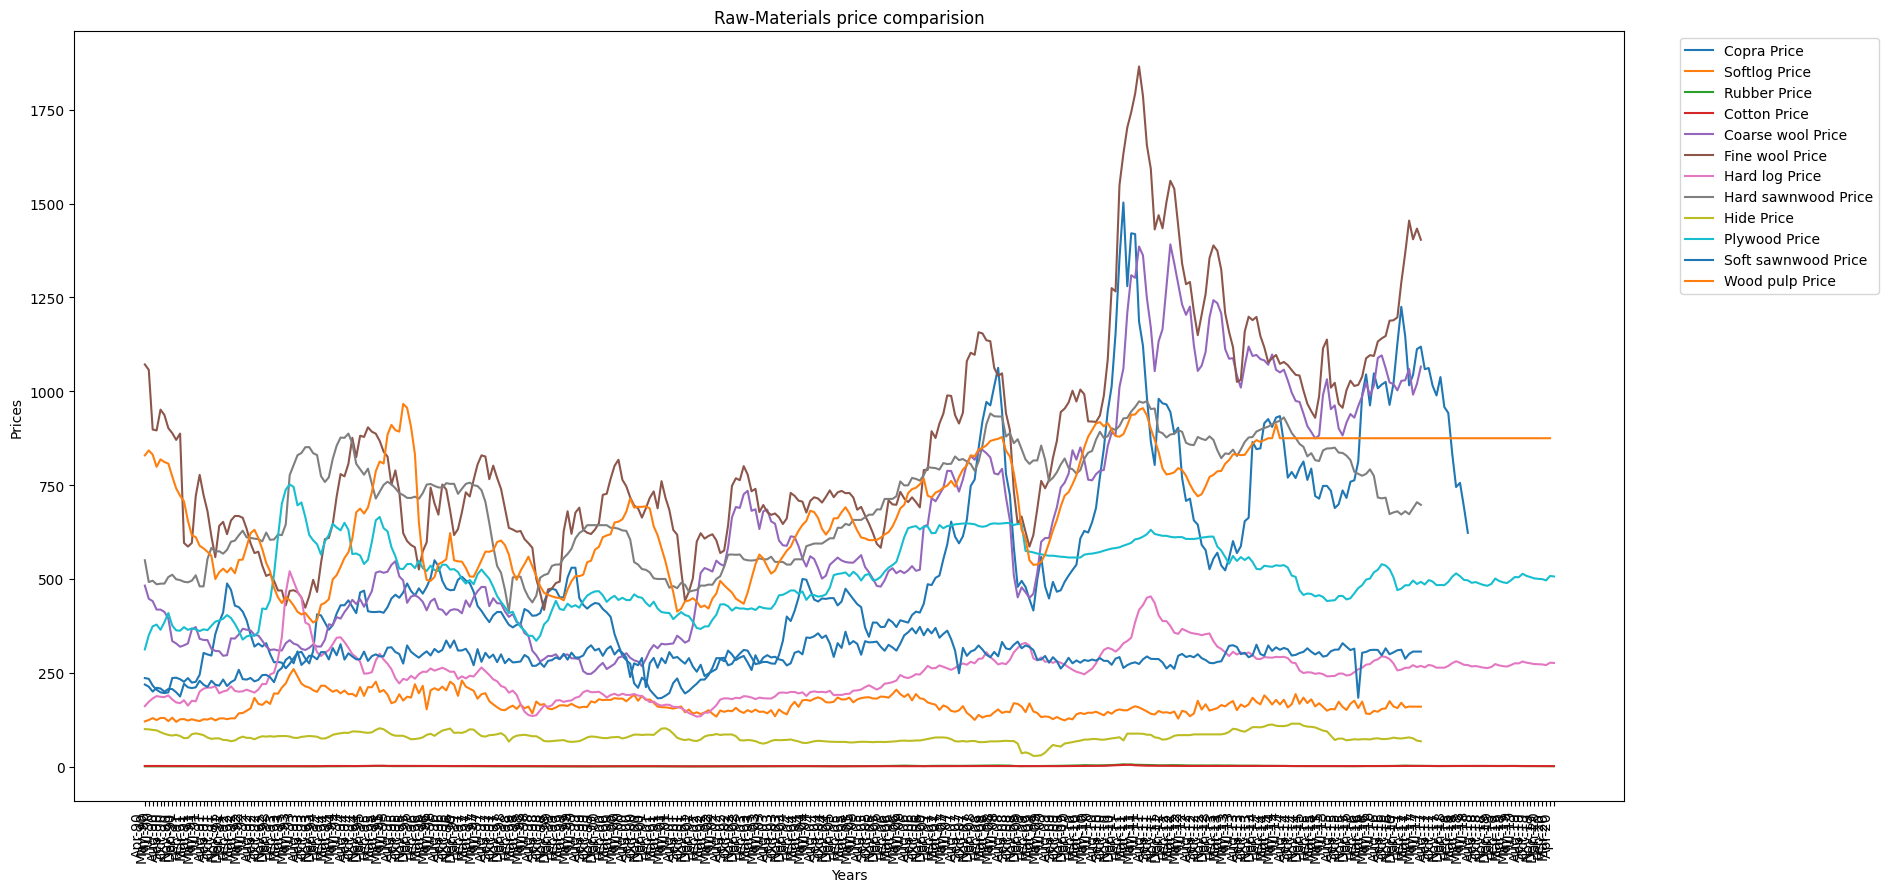

In [60]:
# Plotting multiple columns for raw-materials price comparison
plt.figure(figsize=(20, 10))
plt.plot(df[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price',
             'Hard sawnwood Price','Hide Price',
             'Plywood Price','Soft sawnwood Price','Wood pulp Price']])
plt.title("Raw-Materials price comparision")
plt.xlabel('Years')
plt.xticks(rotation = 90, ha = 'right')
plt.ylabel('Prices')
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price',
            'Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price',
            'Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.1,1))
plt.show()

# Summarise Inferences & Conclusion

**1** Suppose we are planning some bussines which requrired my own raw material than this information will help 


* The given information includes the prices of various raw materials such as Coarse wool, Copra, Cotton, Fine wool, Hard log, Hard sawnwood, Hide, Plywood, Rubber, Softlog, Soft sawnwood, and Wood pulp.
* The respective prices of these raw materials are 320, 471, 1.29, 469, 275, 880, 76, 650, 0.89, 158, 230, and 880 (rounded figures).
* Analyzing the trends in the prices of these raw materials can help us understand which crops are profitable to grow in the future.
* Based on this information, we can forecast the future prices of these raw materials and make a budget accordingly.

**2** Costing accoding to time period 

* For instance, if a business requires a particular raw material during a specific month, analyzing the historical trends in the prices of that material can help in forecasting its future prices. Based on the forecasted prices and the budget allocated for that particular period, the business can plan for the procurement of the raw material.

**3** Overlapping Observation 


Overlapping of raw materials in the price chart does not necessarily mean that the requirement for all materials is the same throughout the year. Each raw material has its unique demand and supply factors that affect its price, and the demand for different materials can vary depending on various factors such as seasonal changes, industry trends, and market conditions.

For example, the demand for cotton may be higher during the summer months when clothing production increases, while the demand for rubber may be higher during the rainy season when there is an increased need for tires and other rubber products. Similarly, the demand for wood products may be higher during the construction season, while the demand for animal hides may be higher during the winter months when the demand for leather products increases.

Therefore, it is important to analyze the demand and supply factors for each raw material separately to understand its unique requirements and forecast its future prices accordingly. This information can help businesses make informed decisions about their procurement and production strategies and ensure that they have sufficient raw materials to meet their production needs.








# THANK YOU FOR VISITING 


**Please share your thoughts, it will be helpful for me**
